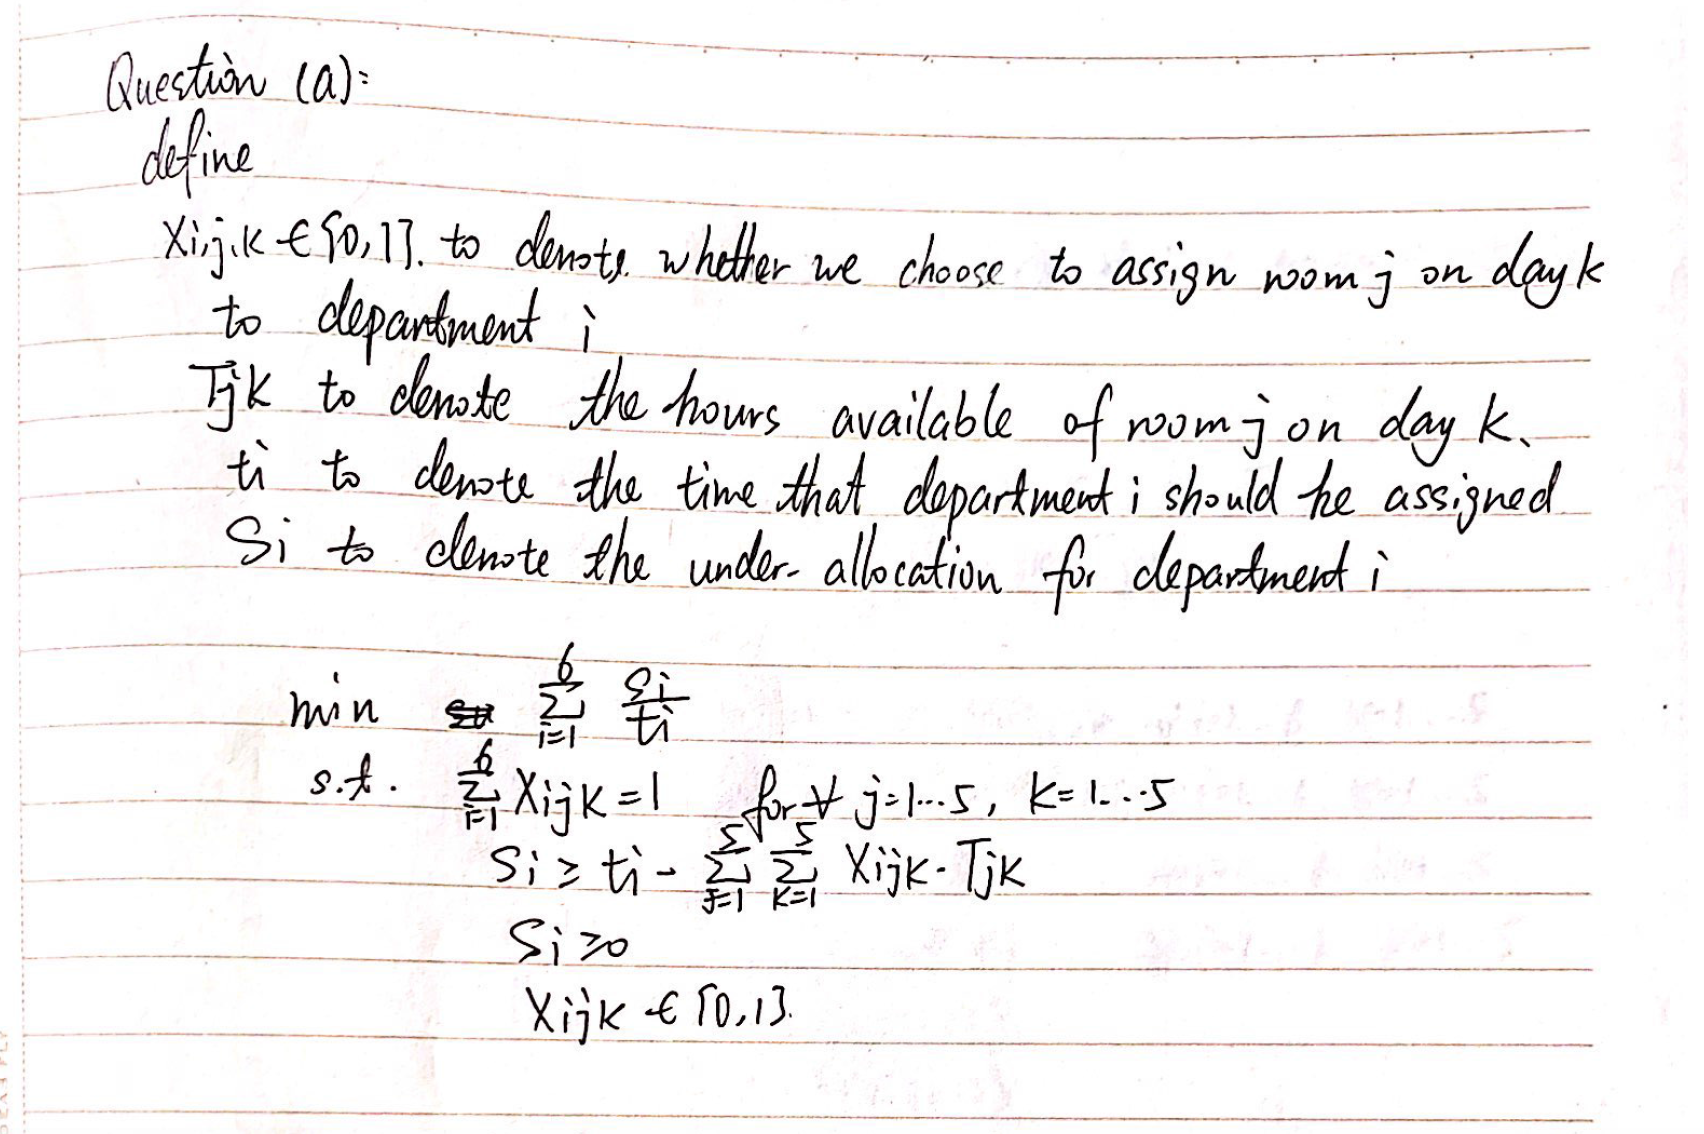

In [9]:
from gurobipy import *
import numpy as np

m=6
n=5
l=5

mod = Model()
x = mod.addVars(m,n,l, vtype = GRB.BINARY)
S = mod.addVars(m)

T = [[9,9,9,9,7.5],[9,9,9,9,7.5],[9,9,9,9,7.5],[9,9,9,9,7.5],[9,8,8,8,6.5]]
t=[0.484*213.5,0.042*213.5,0.253*213.5,0.074*213.5,0.053*213.5,0.095*213.5]
# actual time
time_con = {}
for i in range(m):
    time_con[i] = sum(x[i,j,k]*T[k][j] for j in range(n) for k in range(l) )
    

# each 
for i in range(m):
    mod.addConstr(S[i]>=t[i]-time_con[i])
    mod.addConstr(S[i]>=0)

# each room needs to be assigned exactly once 
full_con = {}
for j in range(n):
    for k in range(l):
        full_con[j,k] =mod.addConstr(sum(x[i,j,k] for i in range(m)) == 1)
    

# Construct objective
mod.setObjective(sum(S[i]/t[i] for i in range(m)), GRB.MINIMIZE)
mod.update()
mod.optimize()

Optimize a model with 37 rows, 156 columns and 312 nonzeros
Variable types: 6 continuous, 150 integer (150 binary)
Coefficient statistics:
  Matrix range     [1e+00, 9e+00]
  Objective range  [1e-02, 1e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+02]
Found heuristic solution: objective 0.9760936
Presolve removed 6 rows and 0 columns
Presolve time: 0.00s
Presolved: 31 rows, 156 columns, 306 nonzeros
Variable types: 6 continuous, 150 integer (150 binary)

Root relaxation: objective 2.066116e-03, 58 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00207    0    9    0.97609    0.00207   100%     -    0s
H    0     0                       0.3257242    0.00207  99.4%     -    0s
H    0     0                       0.2384942    0.00207  99.1%     -    0s
     0     0    0.00207    0   17    0.23849    0.00207  99.1%     -    

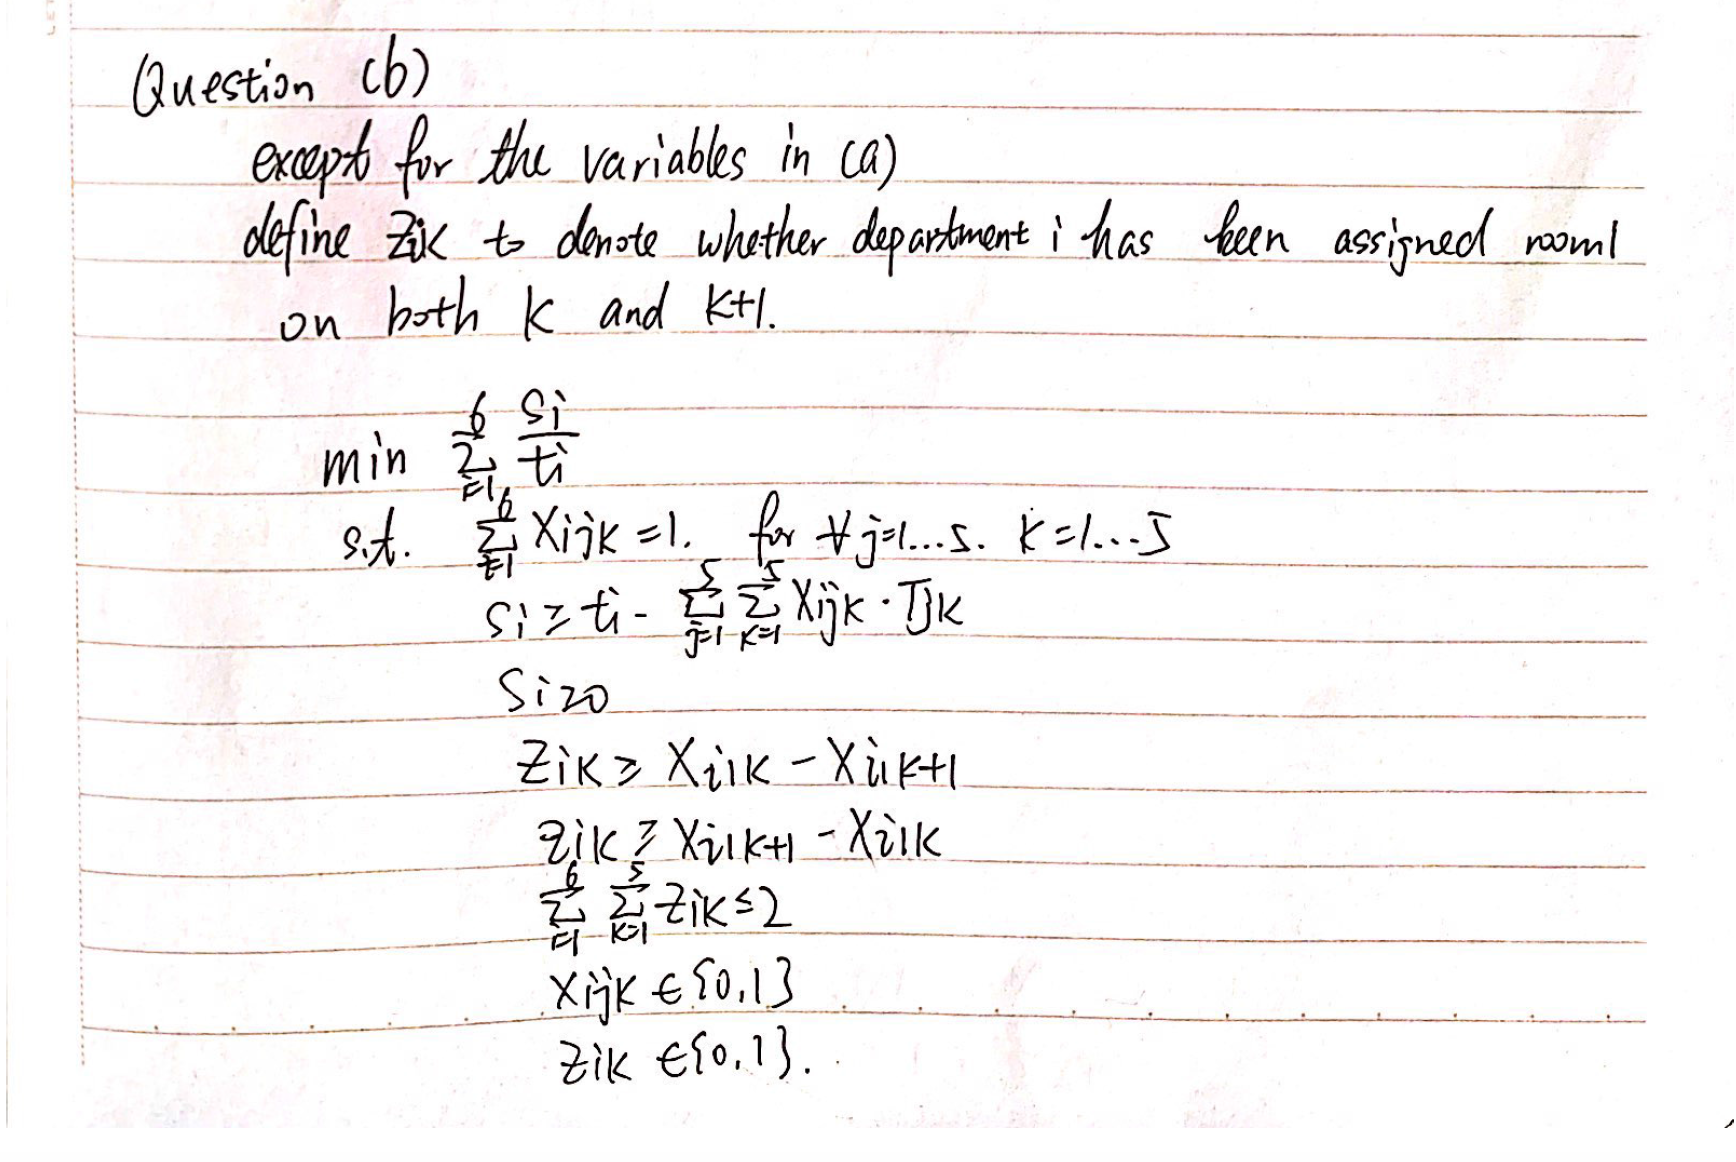

In [10]:
from gurobipy import *
import numpy as np

m=6
n=5
l=5

mod = Model()
x = mod.addVars(m,n,l, vtype = GRB.BINARY)
S = mod.addVars(m)

T = [[9,9,9,9,7.5],[9,9,9,9,7.5],[9,9,9,9,7.5],[9,9,9,9,7.5],[9,8,8,8,6.5]]
t=[0.484*213.5,0.042*213.5,0.253*213.5,0.074*213.5,0.053*213.5,0.095*213.5]
# actual time
time_con = {}
for i in range(m):
    time_con[i] = sum(x[i,j,k]*T[k][j] for j in range(n) for k in range(l) )
    

# each 
for i in range(m):
    mod.addConstr(S[i]>=t[i]-time_con[i])
    mod.addConstr(S[i]>=0)

# each room needs to be assigned exactly once 
full_con = {}
for j in range(n):
    for k in range(l):
        full_con[j,k] =mod.addConstr(sum(x[i,j,k] for i in range(m)) == 1)
##q2 constrains
z = mod.addVars(m,l,vtype = GRB.BINARY)

for i in range(m):
    for k in range(l-1):
        mod.addConstr(z[i,k] >= x[i,0,k]-x[i,0,k+1] )
        mod.addConstr(z[i,k] >= x[i,0,k+1]-x[i,0,k] )

mod.addConstr(sum(z[i,k] for i in range(m) for k in range(l)) <= 2)

# Construct objective
mod.setObjective(sum(S[i]/t[i] for i in range(m)), GRB.MINIMIZE)
mod.update()
mod.optimize()

Optimize a model with 86 rows, 186 columns and 486 nonzeros
Variable types: 6 continuous, 180 integer (180 binary)
Coefficient statistics:
  Matrix range     [1e+00, 9e+00]
  Objective range  [1e-02, 1e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+02]
Found heuristic solution: objective 1.3093312
Presolve removed 6 rows and 6 columns
Presolve time: 0.00s
Presolved: 80 rows, 180 columns, 474 nonzeros
Variable types: 6 continuous, 174 integer (174 binary)

Root relaxation: objective 2.066116e-03, 43 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00207    0    9    1.30933    0.00207   100%     -    0s
H    0     0                       0.5489950    0.00207   100%     -    0s
H    0     0                       0.4801698    0.00207   100%     -    0s
H    0     0                       0.2886463    0.00207  99.3%     -    

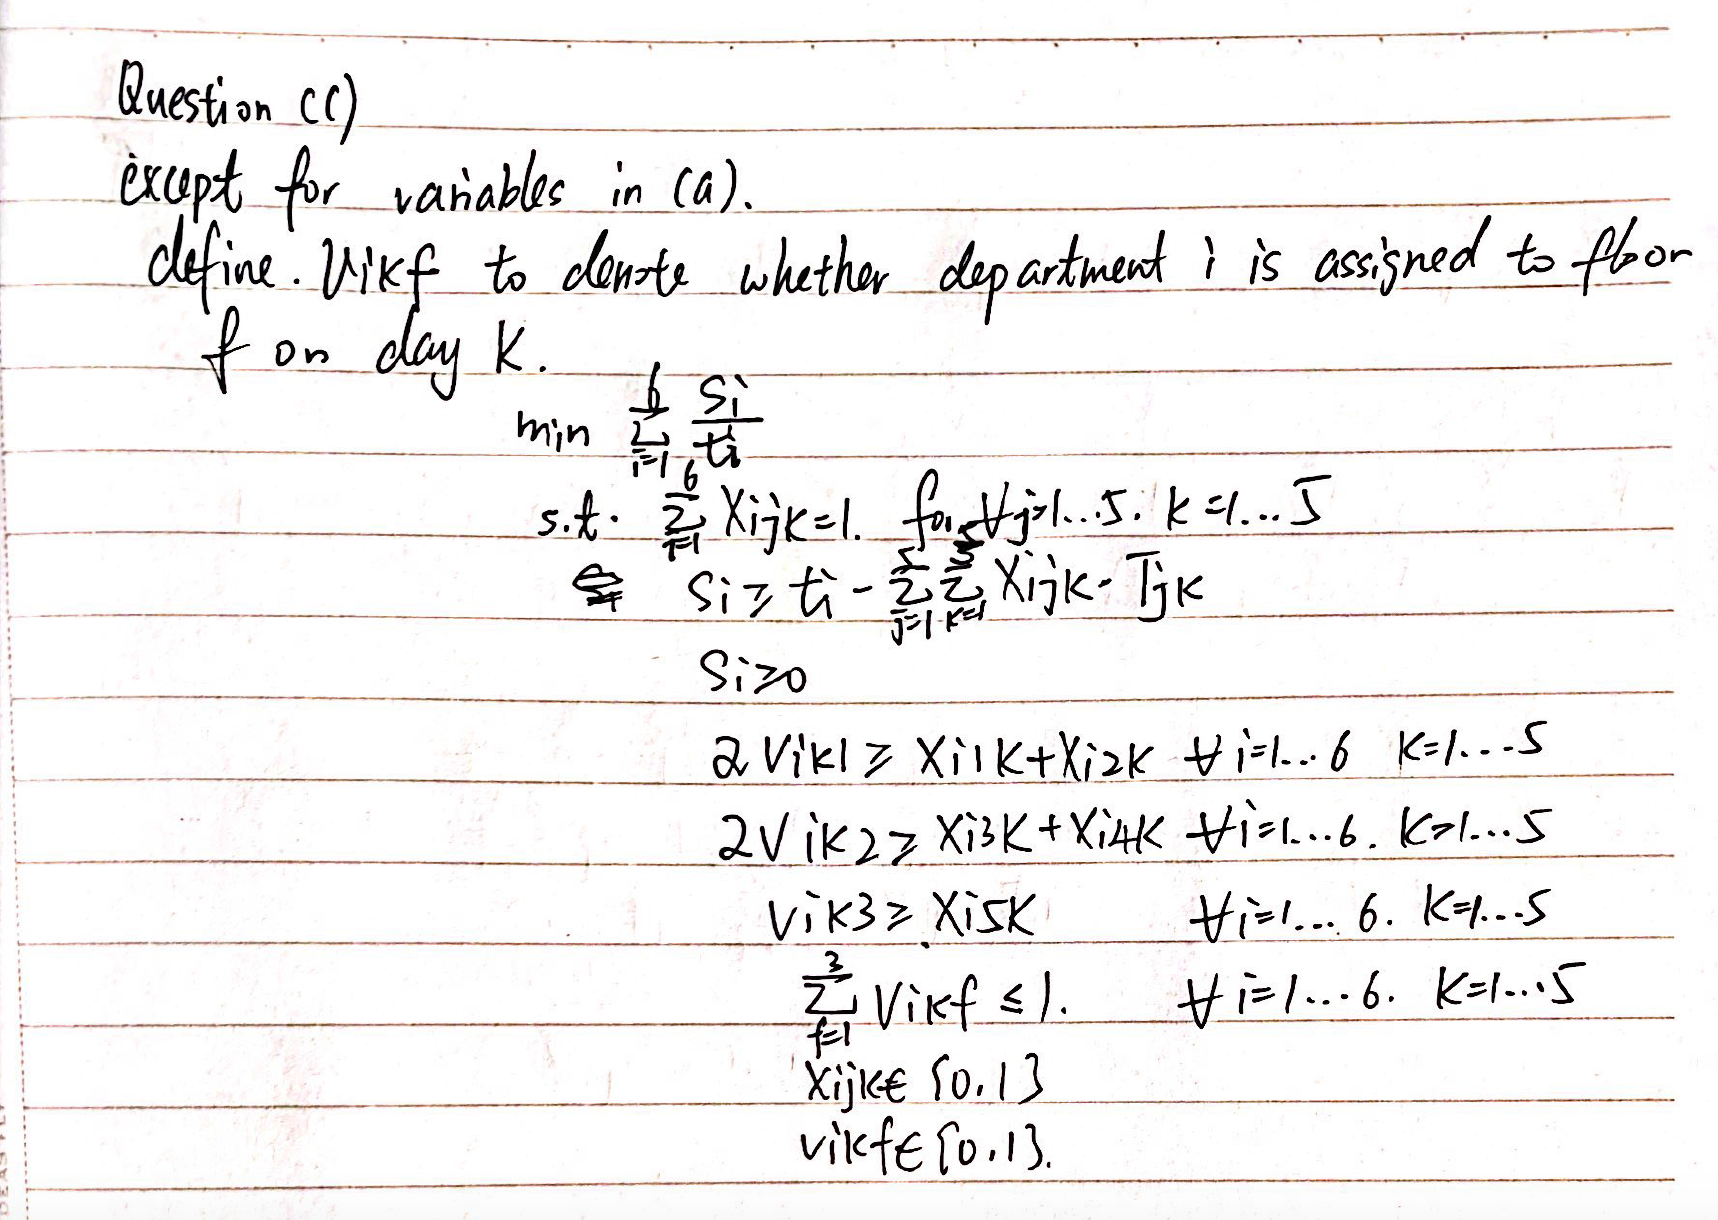

In [11]:
from gurobipy import *
import numpy as np

m=6
n=5
l=5

mod = Model()
x = mod.addVars(m,n,l, vtype = GRB.BINARY)
S = mod.addVars(m)

T = [[9,9,9,9,7.5],[9,9,9,9,7.5],[9,9,9,9,7.5],[9,9,9,9,7.5],[9,8,8,8,6.5]]
t=[0.484*213.5,0.042*213.5,0.253*213.5,0.074*213.5,0.053*213.5,0.095*213.5]
# actual time
time_con = {}
for i in range(m):
    time_con[i] = sum(x[i,j,k]*T[k][j] for j in range(n) for k in range(l) )
    

# each 
for i in range(m):
    mod.addConstr(S[i]>=t[i]-time_con[i])
    mod.addConstr(S[i]>=0)

# each room needs to be assigned exactly once 
full_con = {}
for j in range(n):
    for k in range(l):
        full_con[j,k] =mod.addConstr(sum(x[i,j,k] for i in range(m)) == 1)
    
#q3 constrains:

#since i accidentally used l before, I would refer to floor number as f
q=3
v = mod.addVars(m,l,q,vtype = GRB.BINARY)

#for floor 1
same1_con = {}
for i in range(m):
    for k in range(l):
        same1_con[i,k] =mod.addConstr(2*v[i,k,0] >= x[i,0,k]+x[i,1,k])

#for floor 2
same2_con = {}
for i in range(m):
    for k in range(l):
        same2_con[i,k] =mod.addConstr(2*v[i,k,1] >= x[i,2,k]+x[i,3,k])
        
#for floor 3
same3_con = {}
for i in range(m):
    for k in range(l):
        same3_con[i,k] =mod.addConstr(v[i,k,2] >= x[i,4,k])
#limited to one floor:
for i in range(m):
    for k in range(l):
        mod.addConstr(sum(v[i,k,f] for f in range(q)) <= 1)

# Construct objective
mod.setObjective(sum(S[i]/t[i] for i in range(m)), GRB.MINIMIZE)
mod.update()
mod.optimize()

Optimize a model with 157 rows, 246 columns and 642 nonzeros
Variable types: 6 continuous, 240 integer (240 binary)
Coefficient statistics:
  Matrix range     [1e+00, 9e+00]
  Objective range  [1e-02, 1e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+02]
Found heuristic solution: objective 1.1456577
Presolve removed 66 rows and 60 columns
Presolve time: 0.00s
Presolved: 91 rows, 186 columns, 516 nonzeros
Variable types: 6 continuous, 180 integer (180 binary)

Root relaxation: objective 1.387152e-01, 78 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

H    0     0                       0.1387152    0.00000   100%     -    0s
     0     0     cutoff    0         0.13872    0.13872  0.00%     -    0s

Explored 0 nodes (165 simplex iterations) in 0.06 seconds
Thread count was 4 (of 4 available processors)

Solution count 2: 0.138715 1.14566 

